# Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer 
from datetime import datetime
from datetime import date
import re

%matplotlib inline

#Set path dependencies
data_path = "C:/Users/vichu/Downloads/90106/Ceilometer"

# Import CL51 data

In [2]:
'''
1.1 Import CL51 data
'''
cl51_data_path = "//Ceilometer"

cl51_data_fn_merriwa = ['L3_DEFAULT_0_20210212_Merriwa','L3_DEFAULT_0_20210213_Merriwa',
                        'L3_DEFAULT_0_20210214_Merriwa', 'L3_DEFAULT_0_20210215_Merriwa',
                       'L3_DEFAULT_0_20210216_Merriwa','L3_DEFAULT_0_20210217_Merriwa', 
                       'L3_DEFAULT_0_20210218_Merriwa']


cl51_full_file_path_merriwa = [data_path+cl51_data_path+'//'+path+'.csv' for path in cl51_data_fn_merriwa]

#Initialise a Dataframe with first table
cl51_df_merriwa = pd.read_csv(cl51_full_file_path_merriwa[0])

#Loop through the rest of the data and append. Note both data is same length
for i in range(1,len(cl51_full_file_path_merriwa)):
    cl51_df_merriwa = cl51_df_merriwa.append(pd.read_csv(cl51_full_file_path_merriwa[i]), ignore_index = True)
    
#Set -999 values to np.nan
cl51_df_merriwa = cl51_df_merriwa.replace(-999, np.nan)

In [3]:
#Further breakdown the time stamp
#First convert to datetime object
cl51_df_merriwa['datetime'] = pd.to_datetime(cl51_df_merriwa['# Time'], format='%d/%m/%Y %H:%M:%S')

In [4]:
'''
Imputation

Strategy: Use df.interpolate method = time
'''
#Reset index
cl51_df_merriwa = cl51_df_merriwa.set_index('datetime')

#Define a new column
cl51_df_merriwa = cl51_df_merriwa.assign(revised_bl_height=cl51_df_merriwa.bl_height.interpolate(method='time'))

In [5]:
cl51_df_merriwa

,# Time,Layer_QualityIndex,bl_height,Mean_Layer_Height,n_BL,cloud_stat,cloud_dat,revised_bl_height
datetime,,,,,,,,
2021-02-12 11:00:00,12/02/2021 11:00:00,NaN,2090.0,NaN,3,1,8430.0,2090.0
2021-02-12 11:00:32,12/02/2021 11:00:32,NaN,1430.0,NaN,3,1,8430.0,1430.0
2021-02-12 11:00:48,12/02/2021 11:00:48,NaN,1410.0,NaN,3,1,8430.0,1410.0
2021-02-12 11:01:04,12/02/2021 11:01:04,NaN,1380.0,NaN,3,1,8430.0,1380.0
2021-02-12 11:01:20,12/02/2021 11:01:20,NaN,1400.0,NaN,3,1,8400.0,1400.0
...,...,...,...,...,...,...,...,...
2021-02-19 10:58:40,19/02/2021 10:58:40,2.0,NaN,270.0,3,1,1940.0,500.0
2021-02-19 10:58:56,19/02/2021 10:58:56,2.0,NaN,270.0,3,3,640.0,500.0
2021-02-19 10:59:12,19/02/2021 10:59:12,2.0,NaN,270.0,3,3,640.0,500.0


Text(0.5, 1.0, 'Merriwa - Interpolated BL_height')

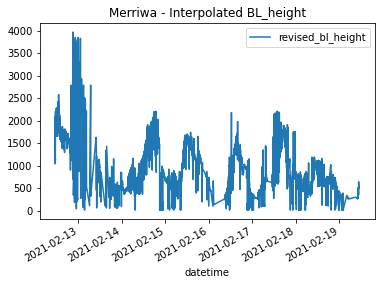

In [6]:
#Raw visualisation

cl51_df_merriwa.plot(y = ['revised_bl_height'])
plt.title('Merriwa - Interpolated BL_height')



Text(0.5, 1.0, 'Merriwa - Original BL')

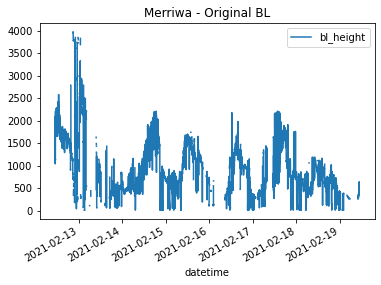

In [7]:

cl51_df_merriwa.plot(y = ['bl_height'])
plt.title('Merriwa - Original BL')


# Import CTM data

In [8]:
'''
2. Import CTM data
'''
data_path2 = "C:/Users/vichu/Downloads/90106/CTM New"

ctm_data_path = "//CTM OUTPUT"

ctm_data_fn_merriwa = ['ctm_gmr_20210212_Merriwa','ctm_gmr_20210213_Merriwa',
                       'ctm_gmr_20210214_Merriwa','ctm_gmr_20210215_Merriwa',
                       'ctm_gmr_20210216_Merriwa','ctm_gmr_20210217_Merriwa',
                       'ctm_gmr_20210218_Merriwa']


ctm_full_file_path_merriwa = [data_path2+ctm_data_path+'//'+path+'.csv' for path in ctm_data_fn_merriwa]


#Initialise a Dataframe with first table
ctm_df_merriwa = pd.read_csv(ctm_full_file_path_merriwa[0])

#Loop through the rest of the data and append. Note both data is same length
for i in range(1,len(ctm_full_file_path_merriwa)):
    ctm_df_merriwa = ctm_df_merriwa.append(pd.read_csv(ctm_full_file_path_merriwa[i]), ignore_index = True)

In [9]:
#Esoteric spaces...
ctm_df_merriwa.keys()

Index(['lat', ' lon', ' date', ' time', ' temperature', ' mixing_height'], dtype='object')

In [10]:
'''
Change time to AEST and set datetime
'''

def convert_df_to_datetime(df):
    df['time_AEST'] = (df[' time'] + 10) % 24

    #Loop through and convert date to proper date
    length_data = len(df)

    #Defined new columns
    df['date_proper'] = 0
    df['datetime'] = ''

    #Sets the date based on change of time and creates a datetime stamp
    #Very clunky but it works
    for i in range(length_data):
        date_1 = str(df.loc[i,' date'])

        year_date_1 = date_1[:4]
        month_date_1 = date_1[4:6]
        day_date_1 = int(date_1[6::])

        if i > 1:
            #This means the day has changed
            if (df.loc[i,'time_AEST'] < df.loc[i-1,'time_AEST']):
                day_date_1 += 1

        df.loc[i, 'date_proper'] = date(int(year_date_1), int(month_date_1), day_date_1)

        #Days are monotonic
        if i > 1:
            if (df.loc[i,'date_proper'] < df.loc[i-1,'date_proper']):
                df.loc[i,'date_proper'] = df.loc[i-1,'date_proper']

        date_proper_1 = str(df.loc[i,'date_proper'])
        time_1 = str(df.loc[i, 'time_AEST'])

        datetime_str = date_proper_1 + " " + time_1
        df.loc[i, 'datetime'] = datetime.strptime(datetime_str, '%Y-%m-%d %H')

    #Set index to datetime
    df = df.set_index('datetime')
    
    return df

In [11]:
#Apply functions
ctm_df_merriwa = convert_df_to_datetime(ctm_df_merriwa)

In [12]:
ctm_df_merriwa

,lat,lon,date,time,temperature,mixing_height,time_AEST,date_proper
datetime,,,,,,,,
2021-02-12 10:00:00,-32.14,150.5,20210212,0,29.91,1460.2307,10,2021-02-12
2021-02-12 11:00:00,-32.14,150.5,20210212,1,32.01,2116.5154,11,2021-02-12
2021-02-12 12:00:00,-32.14,150.5,20210212,2,33.03,2268.4509,12,2021-02-12
2021-02-12 13:00:00,-32.14,150.5,20210212,3,33.56,2332.6211,13,2021-02-12
2021-02-12 14:00:00,-32.14,150.5,20210212,4,33.70,2376.4629,14,2021-02-12
...,...,...,...,...,...,...,...,...
2021-02-19 05:00:00,-32.14,150.5,20210218,19,18.19,156.5146,5,2021-02-19
2021-02-19 06:00:00,-32.14,150.5,20210218,20,18.99,271.2063,6,2021-02-19
2021-02-19 07:00:00,-32.14,150.5,20210218,21,20.34,402.5884,7,2021-02-19


In [13]:
'''
Function: convert CL51 data to grouped data
'''
def cl51_data_grouped(df):
    #Unset datetime index
    cl51_df_v2 = df.reset_index()
    
    #Create unique datetime key with hourly granularity
    cl51_df_v2['key'] = cl51_df_v2['datetime'].dt.year.astype(str)+cl51_df_v2['datetime'].dt.month.astype(str)+cl51_df_v2['datetime'].dt.day.astype(str)+cl51_df_v2['datetime'].dt.hour.astype(str)

    #Group PBLH on key 
    cl51_grouped_df = pd.DataFrame(cl51_df_v2.groupby(cl51_df_v2["key"])["revised_bl_height"].mean())
    
    cl51_grouped_df = cl51_grouped_df.reset_index()
    
    return cl51_grouped_df

In [14]:
cl51_grouped_df_merriwa = cl51_data_grouped(cl51_df_merriwa)

In [15]:
cl51_grouped_df_merriwa

,key,revised_bl_height
0,202121211,1782.971698
1,202121212,2060.904255
2,202121213,1942.894737
3,202121214,1684.731183
4,202121215,1573.967391
...,...,...
162,20212195,264.802803
163,20212196,271.336676
164,20212197,283.446311
165,20212198,295.176486


In [16]:
'''
Function: Combines CL51 and CTM data to one consolidated output
'''
def combined_data(cl51_grouped_df, ctm_df):
    #Use CTM data as base - as this has smaller number of rows
    df = pd.DataFrame(ctm_df.loc[:,' mixing_height'])

    #unset datetime index
    df = df.reset_index()

    #Create key similar to CL51 groupped data
    df['key'] = df['datetime'].dt.year.astype(str)+df['datetime'].dt.month.astype(str)+df['datetime'].dt.day.astype(str)+df['datetime'].dt.hour.astype(str)

    #Merge
    df_2 = pd.merge(df, cl51_grouped_df, how = 'inner', on = 'key').set_index('datetime')
    
    #Drop unnecessary stuff
    df_2 = df_2.drop(columns = 'key')
    
    #rename columns
    df_2 = df_2.rename(columns = {' mixing_height':'Predicted PBLH', 'revised_bl_height':'Actual PBLH'})
    
    return df_2 

In [17]:
comp_df_merriwa = combined_data(cl51_grouped_df_merriwa, ctm_df_merriwa)

In [18]:
#sanity check
comp_df_merriwa

,Predicted PBLH,Actual PBLH
datetime,,
2021-02-12 11:00:00,2116.5154,1782.971698
2021-02-12 12:00:00,2268.4509,2060.904255
2021-02-12 13:00:00,2332.6211,1942.894737
2021-02-12 14:00:00,2376.4629,1684.731183
2021-02-12 15:00:00,2432.8503,1573.967391
...,...,...
2021-02-19 05:00:00,156.5146,264.802803
2021-02-19 06:00:00,271.2063,271.336676
2021-02-19 07:00:00,402.5884,283.446311


In [19]:
comp_df_merriwa1 = comp_df_merriwa
del comp_df_merriwa1['Predicted PBLH']

In [20]:
comp_df_merriwa1

,Actual PBLH
datetime,
2021-02-12 11:00:00,1782.971698
2021-02-12 12:00:00,2060.904255
2021-02-12 13:00:00,1942.894737
2021-02-12 14:00:00,1684.731183
2021-02-12 15:00:00,1573.967391
...,...
2021-02-19 05:00:00,264.802803
2021-02-19 06:00:00,271.336676
2021-02-19 07:00:00,283.446311


# Import historical observations

In [21]:
historical_obs_merriwa = pd.read_csv('C:/Users/vichu/Downloads/90106/Historical Observations - Merriwa.csv', encoding = 'latin1')

In [22]:
def convert_df_to_datetime(df):
    df['time_AEST'] = (df['time'])

    #Loop through and convert date to proper date
    length_data = len(df)

    #Defined new columns
    df['date_proper'] = 0
    df['datetime'] = ''

    #Sets the date based on change of time and creates a datetime stamp
    #Very clunky but it works
    for i in range(length_data):
        date_1 = str(df.loc[i,'date'])

        year_date_1 = date_1[:4]
        month_date_1 = date_1[4:6]
        day_date_1 = int(date_1[6::])

        #if i > 1:
            #This means the day has changed
     #       if (df.loc[i,'time_AEST'] < df.loc[i-1,'time_AEST']):
      #          day_date_1 += 1

        df.loc[i, 'date_proper'] = date(int(year_date_1), int(month_date_1), day_date_1)

        #Days are monotonic
        if i > 1:
            if (df.loc[i,'date_proper'] < df.loc[i-1,'date_proper']):
                df.loc[i,'date_proper'] = df.loc[i-1,'date_proper']

        date_proper_1 = str(df.loc[i,'date_proper'])
        time_1 = str(df.loc[i, 'time_AEST'])

        datetime_str = date_proper_1 + " " + time_1
        df.loc[i, 'datetime'] = datetime.strptime(datetime_str, '%Y-%m-%d %H')

    #Set index to datetime
    df = df.set_index('datetime')
    
    return df

In [23]:
ext_df_merriwa = convert_df_to_datetime(historical_obs_merriwa)

In [24]:
ext_df_merriwa

,date,time,AQI (based on 24 h rolling PM),AQI,CO (ppm),Humidity (ppm),Nephelometer (10^-4 m^-1),Nephelometer (index),NO (pphm),NO2 (index),...,PM2.5 (µg/m³),PM2.5 (index),PM10 (µg/m³),PM10 (index),Rainfall (mm),Temperature (degree C),Wind direction (degree),Wind speed (m/s),time_AEST,date_proper
datetime,,,,,,,,,,,,,,,,,,,,,
2021-02-12 11:00:00,20210212,11,38.58,29.1125,-0.013024,47.927,0.042,1.904762,-0.023461,0.583333,...,1.629,2.629032,23.290,29.1125,0.0,26.696,331.472,7.140,11,2021-02-12
2021-02-12 12:00:00,20210212,12,39.50,30.0000,-0.003834,46.820,0.051,2.380952,-0.015987,0.666667,...,7.472,12.048387,18.506,23.1375,0.0,27.329,341.235,5.896,12,2021-02-12
2021-02-12 13:00:00,20210212,13,40.80,33.3750,-0.004704,45.996,0.058,2.857143,-0.011745,0.583333,...,6.195,10.000000,22.723,28.4000,0.0,28.087,345.758,6.096,13,2021-02-12
2021-02-12 14:00:00,20210212,14,41.80,36.6250,-0.003592,44.181,0.060,2.857143,-0.026188,0.500000,...,2.025,3.274194,19.386,24.2375,0.0,28.844,333.913,6.070,14,2021-02-12
2021-02-12 15:00:00,20210212,15,42.80,39.1250,-0.002880,43.716,0.065,3.333333,-0.021037,0.416667,...,-4.037,-6.516129,19.332,24.1625,0.0,29.141,339.577,5.807,15,2021-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-19 05:00:00,20210219,5,33.64,16.0250,-0.033830,91.658,0.102,4.761905,-0.022306,1.416667,...,1.575,2.548387,12.816,16.0250,0.0,17.554,129.513,2.405,5,2021-02-19
2021-02-19 06:00:00,20210219,6,33.02,13.7500,-0.035252,91.979,0.105,5.238095,-0.011042,1.166667,...,2.849,4.596774,9.865,12.3375,0.0,17.778,130.756,2.853,6,2021-02-19
2021-02-19 07:00:00,20210219,7,32.72,13.5000,-0.032138,92.351,0.099,4.761905,0.039190,2.250000,...,2.504,4.032258,10.615,13.2750,0.0,18.322,109.467,3.619,7,2021-02-19


In [25]:
merged_merriwa = pd.merge(comp_df_merriwa1, ext_df_merriwa, how = 'inner', on = 'datetime')

In [26]:
merged_merriwa

,Actual PBLH,date,time,AQI (based on 24 h rolling PM),AQI,CO (ppm),Humidity (ppm),Nephelometer (10^-4 m^-1),Nephelometer (index),NO (pphm),...,PM2.5 (µg/m³),PM2.5 (index),PM10 (µg/m³),PM10 (index),Rainfall (mm),Temperature (degree C),Wind direction (degree),Wind speed (m/s),time_AEST,date_proper
datetime,,,,,,,,,,,,,,,,,,,,,
2021-02-12 11:00:00,1782.971698,20210212,11,38.58,29.1125,-0.013024,47.927,0.042,1.904762,-0.023461,...,1.629,2.629032,23.290,29.1125,0.0,26.696,331.472,7.140,11,2021-02-12
2021-02-12 12:00:00,2060.904255,20210212,12,39.50,30.0000,-0.003834,46.820,0.051,2.380952,-0.015987,...,7.472,12.048387,18.506,23.1375,0.0,27.329,341.235,5.896,12,2021-02-12
2021-02-12 13:00:00,1942.894737,20210212,13,40.80,33.3750,-0.004704,45.996,0.058,2.857143,-0.011745,...,6.195,10.000000,22.723,28.4000,0.0,28.087,345.758,6.096,13,2021-02-12
2021-02-12 14:00:00,1684.731183,20210212,14,41.80,36.6250,-0.003592,44.181,0.060,2.857143,-0.026188,...,2.025,3.274194,19.386,24.2375,0.0,28.844,333.913,6.070,14,2021-02-12
2021-02-12 15:00:00,1573.967391,20210212,15,42.80,39.1250,-0.002880,43.716,0.065,3.333333,-0.021037,...,-4.037,-6.516129,19.332,24.1625,0.0,29.141,339.577,5.807,15,2021-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-19 05:00:00,264.802803,20210219,5,33.64,16.0250,-0.033830,91.658,0.102,4.761905,-0.022306,...,1.575,2.548387,12.816,16.0250,0.0,17.554,129.513,2.405,5,2021-02-19
2021-02-19 06:00:00,271.336676,20210219,6,33.02,13.7500,-0.035252,91.979,0.105,5.238095,-0.011042,...,2.849,4.596774,9.865,12.3375,0.0,17.778,130.756,2.853,6,2021-02-19
2021-02-19 07:00:00,283.446311,20210219,7,32.72,13.5000,-0.032138,92.351,0.099,4.761905,0.039190,...,2.504,4.032258,10.615,13.2750,0.0,18.322,109.467,3.619,7,2021-02-19


In [27]:
merged_merriwa['Solar radiation (W/m^2)']

datetime
2021-02-12 11:00:00   NaN
2021-02-12 12:00:00   NaN
2021-02-12 13:00:00   NaN
2021-02-12 14:00:00   NaN
2021-02-12 15:00:00   NaN
                       ..
2021-02-19 05:00:00   NaN
2021-02-19 06:00:00   NaN
2021-02-19 07:00:00   NaN
2021-02-19 08:00:00   NaN
2021-02-19 09:00:00   NaN
Name: Solar radiation (W/m^2), Length: 166, dtype: float64

In [28]:
merged_merriwa.keys()

Index(['Actual PBLH', 'date', 'time', 'AQI (based on 24 h rolling PM)', 'AQI',
       'CO (ppm)', 'Humidity (ppm)', 'Nephelometer (10^-4 m^-1)',
       'Nephelometer (index)', 'NO (pphm)', 'NO2 (index)', 'NO2 (pphm)',
       'SO2 (pphm)', 'SO2 (index)', 'SD1 (degree)', 'Solar radiation (W/m^2)',
       'Ozone (pphm)', 'Ozone (index)', 'PM2.5 (µg/m³)', 'PM2.5 (index)',
       'PM10 (µg/m³)', 'PM10 (index)', 'Rainfall (mm)',
       'Temperature (degree C)', 'Wind direction (degree)', 'Wind speed (m/s)',
       'time_AEST', 'date_proper'],
      dtype='object')

# Plots comparing the actual BL height with external factors (weather)

Text(0.5, 1.0, 'Wind Direction Sigma Theta')

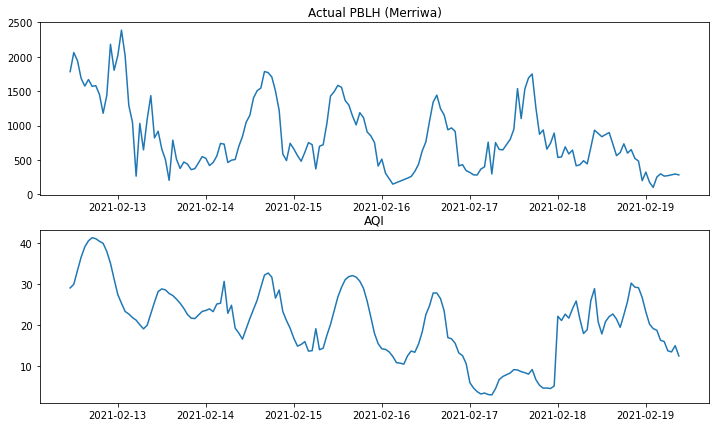

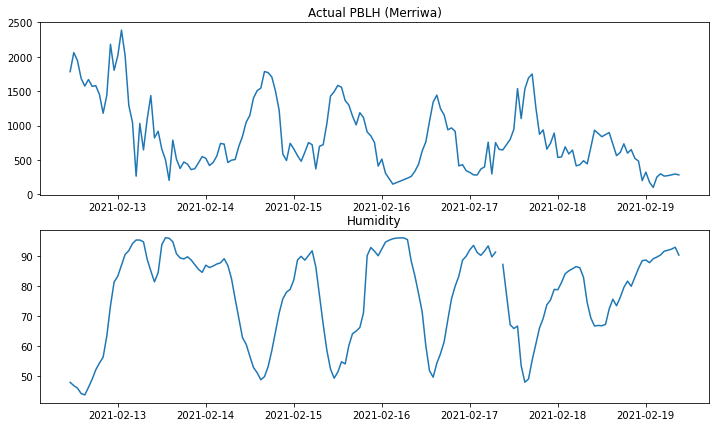

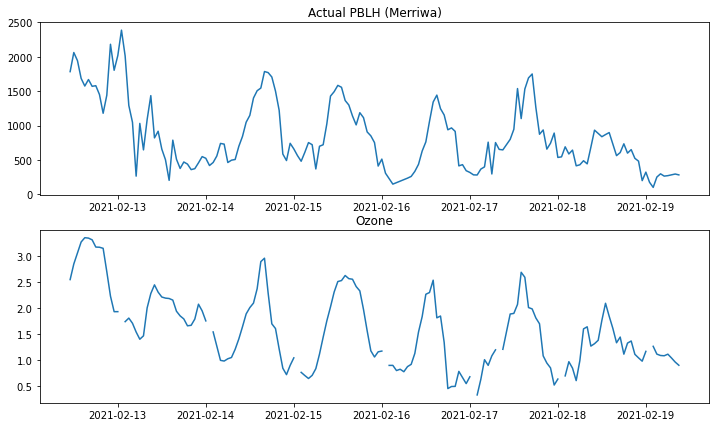

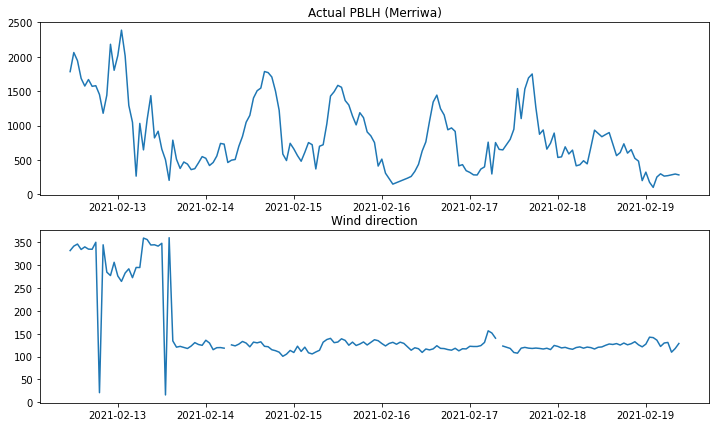

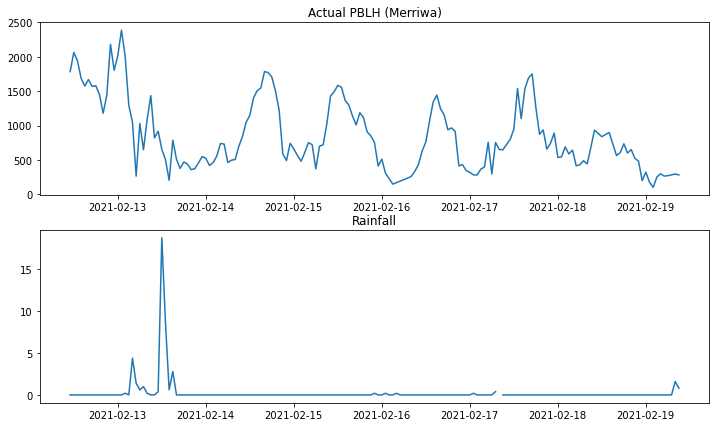

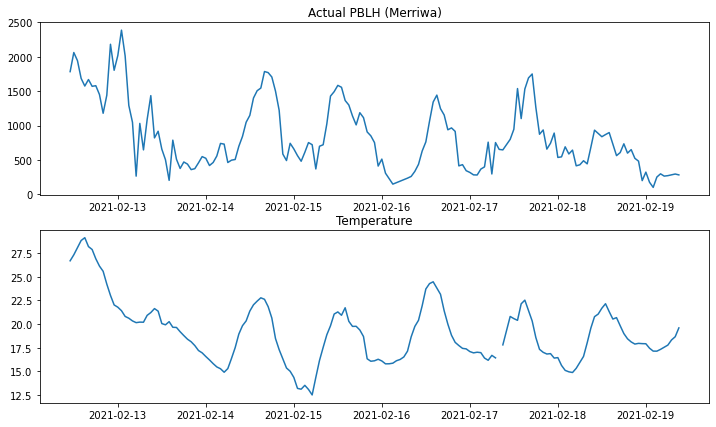

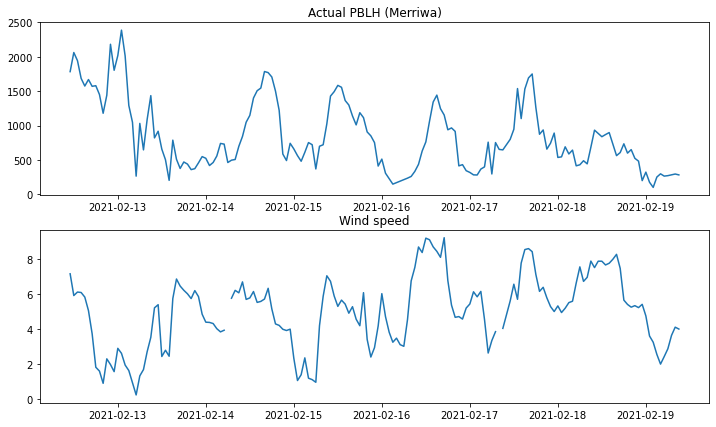

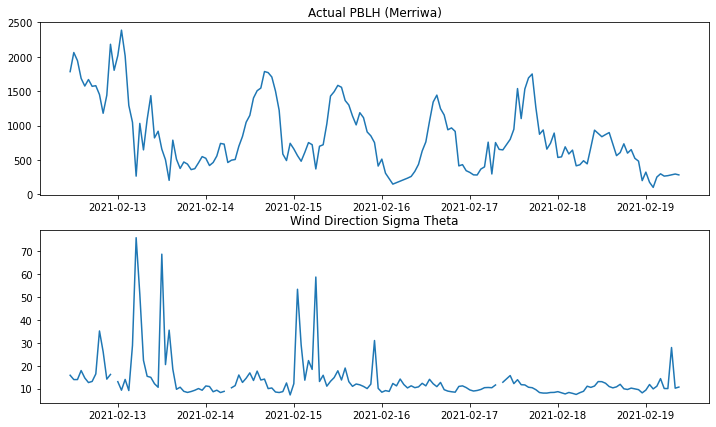

In [29]:
# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

# Add x-axis and y-axis
ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['AQI'])
ax[1].set_title('AQI')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

# Add x-axis and y-axis
ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['Humidity (ppm)'])
ax[1].set_title('Humidity')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

# Add x-axis and y-axis
ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['Ozone (pphm)'])
ax[1].set_title('Ozone')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['Wind direction (degree)'])
ax[1].set_title('Wind direction')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['Rainfall (mm)'])
ax[1].set_title('Rainfall')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['Temperature (degree C)'])
ax[1].set_title('Temperature')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['Wind speed (m/s)'])
ax[1].set_title('Wind speed')

fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['SD1 (degree)'])
ax[1].set_title('Wind Direction Sigma Theta')

# Plots comparing the actual BL height with external factors (chemicals)

Text(0.5, 1.0, 'PM10')

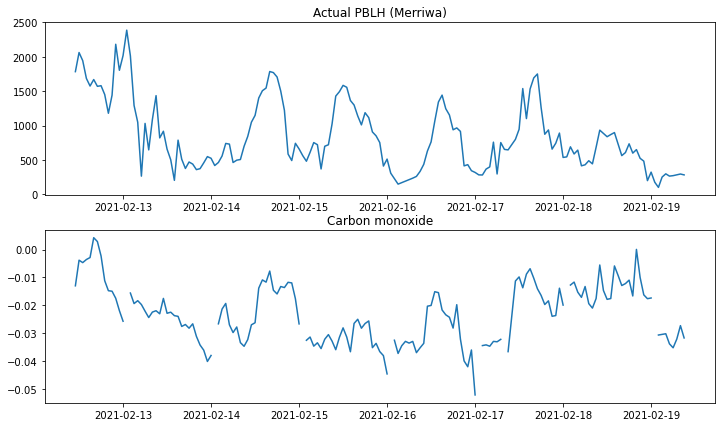

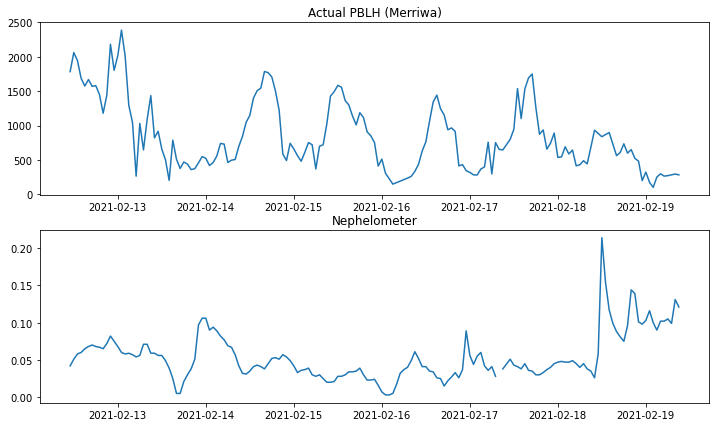

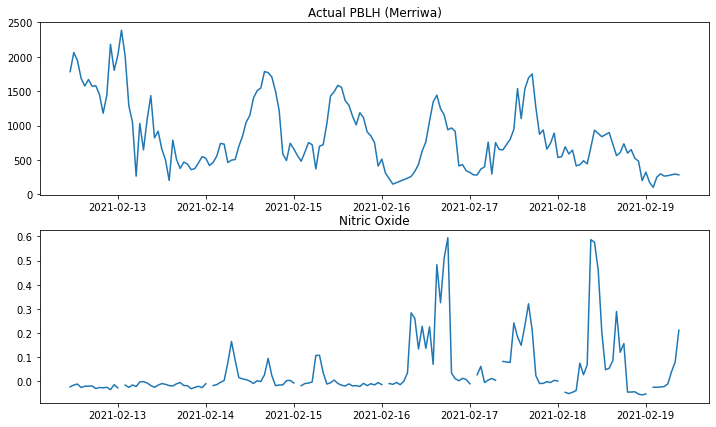

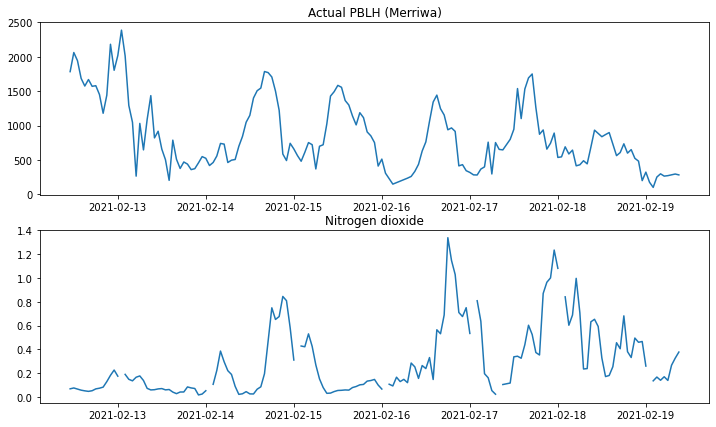

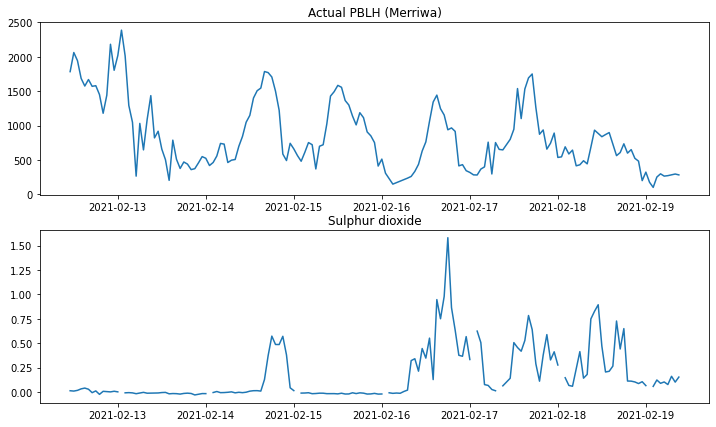

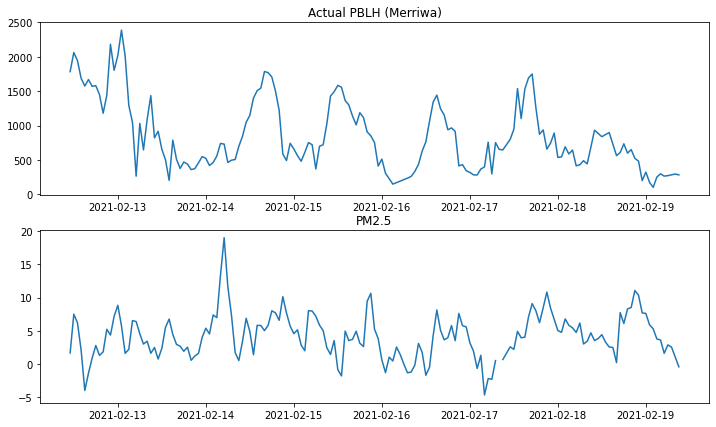

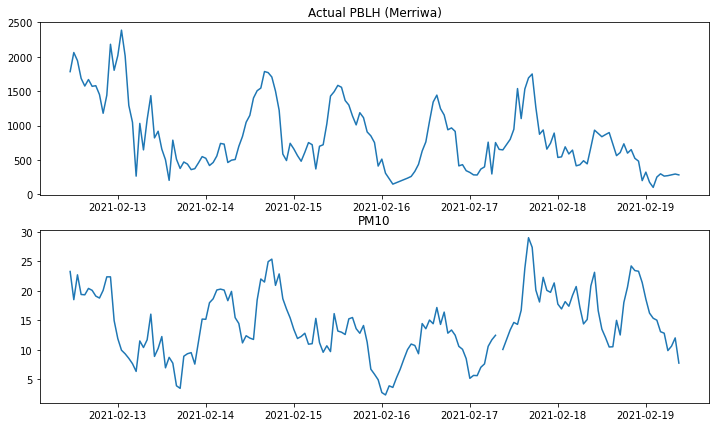

In [30]:
# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

# Add x-axis and y-axis
ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['CO (ppm)'])
ax[1].set_title('Carbon monoxide')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

# Add x-axis and y-axis
ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['Nephelometer (10^-4 m^-1)'])
ax[1].set_title('Nephelometer')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['NO (pphm)'])
ax[1].set_title('Nitric Oxide')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['NO2 (pphm)'])
ax[1].set_title('Nitrogen dioxide')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['SO2 (pphm)'])
ax[1].set_title('Sulphur dioxide')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['PM2.5 (µg/m³)'])
ax[1].set_title('PM2.5')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_merriwa['Actual PBLH'])
ax[0].set_title('Actual PBLH (Merriwa)')


ax[1].plot(merged_merriwa['PM10 (µg/m³)'])
ax[1].set_title('PM10')

Text(0.5, 1.0, 'Actual PBLH vs Wind Speed')

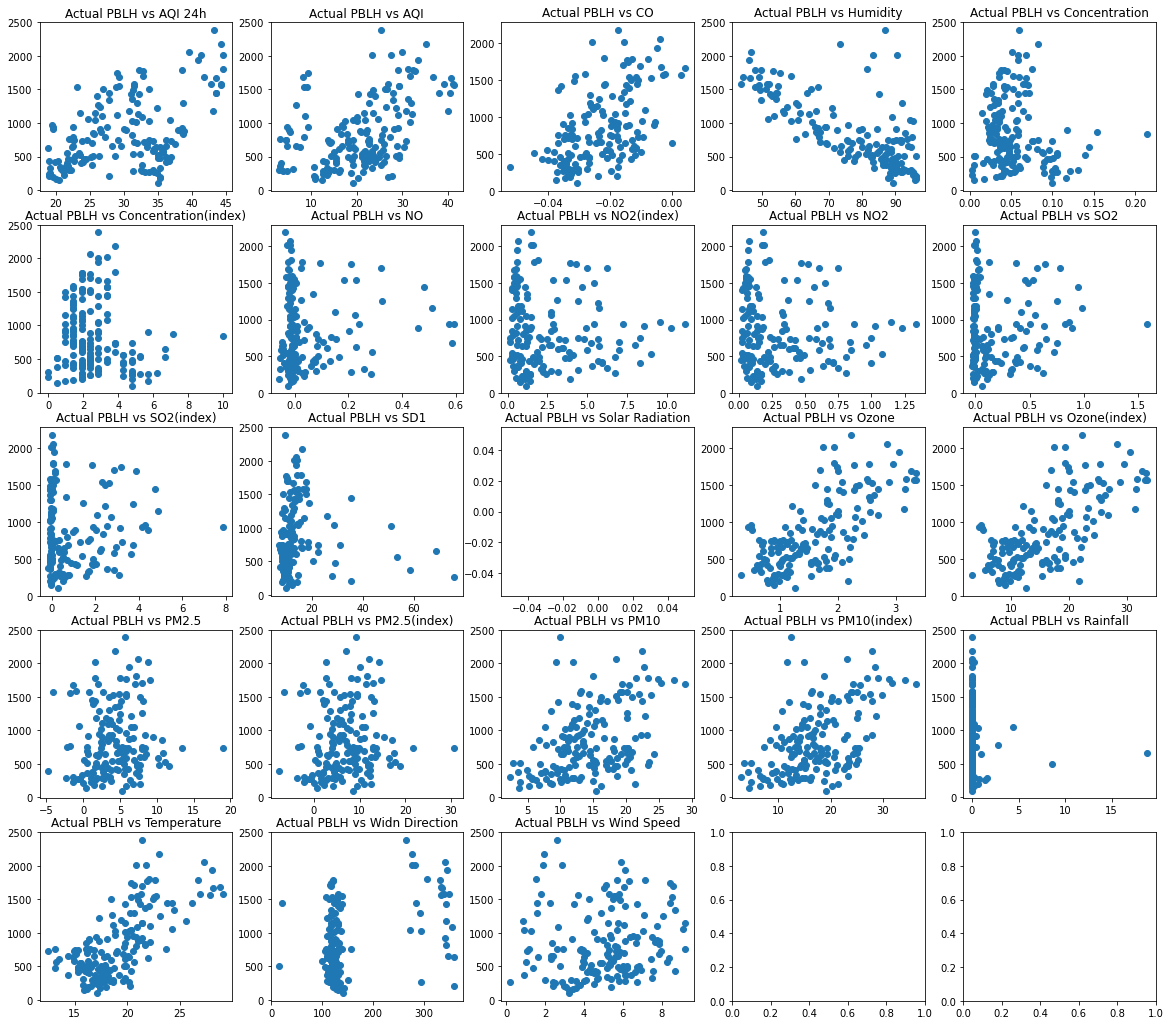

In [31]:
fig, ax= plt.subplots(5, 5, figsize=(20, 18))

ax[0, 0].scatter(merged_merriwa['AQI (based on 24 h rolling PM)'], merged_merriwa['Actual PBLH'])
ax[0, 0].set_title('Actual PBLH vs AQI 24h')

ax[0, 1].scatter(merged_merriwa['AQI'], merged_merriwa['Actual PBLH'])
ax[0, 1].set_title('Actual PBLH vs AQI')

ax[0, 2].scatter(merged_merriwa['CO (ppm)'], merged_merriwa['Actual PBLH'])
ax[0, 2].set_title('Actual PBLH vs CO')

ax[0, 3].scatter(merged_merriwa['Humidity (ppm)'], merged_merriwa['Actual PBLH'])
ax[0, 3].set_title('Actual PBLH vs Humidity')

ax[0, 4].scatter(merged_merriwa['Nephelometer (10^-4 m^-1)'], merged_merriwa['Actual PBLH'])
ax[0, 4].set_title('Actual PBLH vs Concentration')

ax[1, 0].scatter(merged_merriwa['Nephelometer (index)'], merged_merriwa['Actual PBLH'])
ax[1, 0].set_title('Actual PBLH vs Concentration(index)')

ax[1, 1].scatter(merged_merriwa['NO (pphm)'], merged_merriwa['Actual PBLH'])
ax[1, 1].set_title('Actual PBLH vs NO')

ax[1, 2].scatter(merged_merriwa['NO2 (index)'], merged_merriwa['Actual PBLH'])
ax[1, 2].set_title('Actual PBLH vs NO2(index)')

ax[1, 3].scatter(merged_merriwa['NO2 (pphm)'], merged_merriwa['Actual PBLH'])
ax[1, 3].set_title('Actual PBLH vs NO2')

ax[1, 4].scatter(merged_merriwa['SO2 (pphm)'], merged_merriwa['Actual PBLH'])
ax[1, 4].set_title('Actual PBLH vs SO2')

ax[2, 0].scatter(merged_merriwa['SO2 (index)'], merged_merriwa['Actual PBLH'])
ax[2, 0].set_title('Actual PBLH vs SO2(index)')

ax[2, 1].scatter(merged_merriwa['SD1 (degree)'], merged_merriwa['Actual PBLH'])
ax[2, 1].set_title('Actual PBLH vs SD1')

ax[2, 2].scatter(merged_merriwa['Solar radiation (W/m^2)'], merged_merriwa['Actual PBLH'])
ax[2, 2].set_title('Actual PBLH vs Solar Radiation')

ax[2, 3].scatter(merged_merriwa['Ozone (pphm)'], merged_merriwa['Actual PBLH'])
ax[2, 3].set_title('Actual PBLH vs Ozone')

ax[2, 4].scatter(merged_merriwa['Ozone (index)'], merged_merriwa['Actual PBLH'])
ax[2, 4].set_title('Actual PBLH vs Ozone(index)')

ax[3, 0].scatter(merged_merriwa['PM2.5 (µg/m³)'], merged_merriwa['Actual PBLH'])
ax[3, 0].set_title('Actual PBLH vs PM2.5')

ax[3, 1].scatter(merged_merriwa['PM2.5 (index)'], merged_merriwa['Actual PBLH'])
ax[3, 1].set_title('Actual PBLH vs PM2.5(index)')

ax[3, 2].scatter(merged_merriwa['PM10 (µg/m³)'], merged_merriwa['Actual PBLH'])
ax[3, 2].set_title('Actual PBLH vs PM10')

ax[3, 3].scatter(merged_merriwa['PM10 (index)'], merged_merriwa['Actual PBLH'])
ax[3, 3].set_title('Actual PBLH vs PM10(index)')

ax[3, 4].scatter(merged_merriwa['Rainfall (mm)'], merged_merriwa['Actual PBLH'])
ax[3, 4].set_title('Actual PBLH vs Rainfall')

ax[4, 0].scatter(merged_merriwa['Temperature (degree C)'], merged_merriwa['Actual PBLH'])
ax[4, 0].set_title('Actual PBLH vs Temperature')

ax[4, 1].scatter(merged_merriwa['Wind direction (degree)'], merged_merriwa['Actual PBLH'])
ax[4, 1].set_title('Actual PBLH vs Widn Direction')

ax[4, 2].scatter(merged_merriwa['Wind speed (m/s)'], merged_merriwa['Actual PBLH'])
ax[4, 2].set_title('Actual PBLH vs Wind Speed')